In [14]:
import torch
import torch.nn  as nn

In [12]:
# first we create a dataset


N = 100
true_weight = 2.5
true_bias = -1.0
sigma = 3

x = torch.linspace(0, 10, N).unsqueeze(1)


y = true_weight * x + true_bias + sigma * torch.randn_like(x)


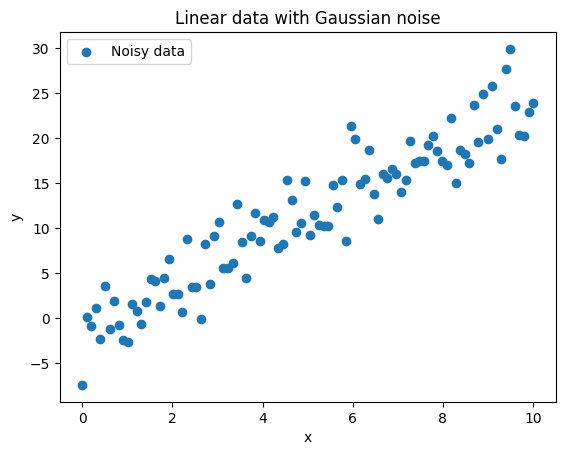

In [13]:
#visualize the data
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label="Noisy data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear data with Gaussian noise")
plt.legend()
plt.show()


In [23]:
#spilt the dataset into training and test sets randomly

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

x = x.to(device)
y = y.to(device)


train_size = int(0.8 * N)

# Shuffle indices
indices = torch.randperm(N, device=device)

train_idx = indices[:train_size]
pred_idx  = indices[train_size:]

x_train = x[train_idx]
y_train = y[train_idx]

x_pred = x[pred_idx]
y_pred = y[pred_idx]


In [24]:
#create the model

class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = RegressionModel().to(device)






tensor([[24.8534],
        [18.6515],
        [ 3.4467],
        [14.9862],
        [18.1834],
        [-2.3732],
        [-1.2390],
        [15.2877],
        [ 6.5548],
        [20.2128],
        [15.5750],
        [19.8495],
        [15.9961],
        [23.6305],
        [ 7.8039],
        [ 1.5582],
        [ 4.5026],
        [11.4945],
        [16.0519],
        [10.9250]], device='cuda:0')
torch.Size([20, 1])
